### Component 2
#### 04/22/2017
----
#### Read in the Grant data

In [50]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy

In [2]:
data = pd.read_csv('DiscGrants96to13.csv', encoding='latin')

In [3]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
3,IA-00-00-0004-00,Bob Jones Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 613,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN


In [4]:
data.keys()

Index(['LogNumber', 'Institution', 'Program', 'ProgramType', 'ProjectTitle',
       'ProjectType', 'AwardDate', 'InstAddr1', 'InstAddr2', 'InstAddr3',
       'InstCity', 'InstState', 'InstZip', 'AwardOrig', 'AwardTotal',
       'AppMatchAmount', 'ReqAwardAmount', 'ReqMatchAmount', 'Prefix',
       'FirstName', 'LastName', 'OrgType', 'FiscalYear', 'AwardPeriodFr',
       'AwardPeriodTo', 'OrgUnit', 'OUAddr1', 'OUAddr2', 'OUAddr3', 'OUCity',
       'OUState', 'OUZip', 'Latitude', 'Longitude', 'FIPSState', 'FIPSCounty',
       'CensusTract', 'CensusBlock', 'FIPSMCDCode', 'FIPSPlaceCode',
       'CBSACode', 'MetroDivisionCode', 'Description'],
      dtype='object')

In [6]:
data.dropna(subset = ['Latitude', 'Longitude'], axis = 0, inplace = True)

In [7]:
data.head()

,LogNumber,Institution,Program,ProgramType,ProjectTitle,ProjectType,AwardDate,InstAddr1,InstAddr2,InstAddr3,...,Longitude,FIPSState,FIPSCounty,CensusTract,CensusBlock,FIPSMCDCode,FIPSPlaceCode,CBSACode,MetroDivisionCode,Description
0,IA-00-00-0001-00,Museum of the Aleutians,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 648,NaN,NaN,...,-166.536862,2.0,16.0,200.0,2014.0,1615.0,80770.0,NaN,NaN,NaN
1,IA-00-00-0002-00,"Depot Museum, Inc.",Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,P.O. Box 681420,NaN,NaN,...,-85.694757,1.0,49.0,961000.0,2013.0,91206.0,27616.0,NaN,NaN,NaN
2,IA-00-00-0003-00,National Voting Rights Museum and Institute,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,6 Highway 80 East,NaN,NaN,...,-87.017024,1.0,47.0,957200.0,1005.0,92883.0,NaN,42820.0,NaN,NaN
4,IA-00-00-0005-00,Coronado Museum of History and Art,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,1100 Orange Avenue,NaN,NaN,...,-117.170703,6.0,73.0,10900.0,1021.0,92780.0,16378.0,41740.0,NaN,NaN
5,IA-00-00-0006-00,Hayward Area Historical Society Museum,Conservation Assessment Prog.,IA,NaN,NaN,3/30/2000,22701 Main Street,NaN,NaN,...,-122.089393,6.0,1.0,435400.0,3003.0,91260.0,33000.0,41860.0,36084,NaN


In [8]:
data['ProgramType'].unique()

array(['IA', 'IC', 'IG', 'IL', 'IM', 'IS', 'LE', 'LG', 'LI', 'LT', 'MA',
       'MH', 'ML', 'MN', 'RE', 'ST', 'MP'], dtype=object)

In [9]:
data['InstState'].unique()

array(['AK', 'AL', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL',
       'IN', 'KS', 'KY', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT',
       'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA',
       'PR', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV',
       'AR', 'AZ', 'IA', 'ND', 'RI', 'DE', 'LA', 'WY', 'VI', nan], dtype=object)

## Data management: 
### Read new dataset of US States Abbreviation and merge with existing data

In [10]:
Statescount=data.groupby("InstState").size().reset_index(name='count')
Statescount.columns=["Abbreviation","count"]
Statescount.head()

,Abbreviation,count
0,AK,948
1,AL,95
2,AR,51
3,AZ,301
4,CA,1407


In [12]:
states = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv', encoding='latin')
statescount=pd.merge(states, Statescount, on='Abbreviation', how='outer')
statescount=statescount.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
countdict = dict(zip(statescount["State"], statescount["count"]))
vmax=max(countdict.values())
vmin=min(countdict.values())
states_shortname=dict(zip(states["State"],states["Abbreviation"]))


{'Alabama': 95,
 'Alaska': 948,
 'Arizona': 301,
 'Arkansas': 51,
 'California': 1407,
 'Colorado': 234,
 'Connecticut': 230,
 'Delaware': 58,
 'District of Columbia': 144,
 'Florida': 324,
 'Georgia': 128,
 'Hawaii': 89,
 'Idaho': 47,
 'Illinois': 443,
 'Indiana': 152,
 'Iowa': 128,
 'Kansas': 125,
 'Kentucky': 116,
 'Louisiana': 127,
 'Maine': 203,
 'Maryland': 243,
 'Massachusetts': 527,
 'Michigan': 427,
 'Minnesota': 222,
 'Mississippi': 50,
 'Missouri': 174,
 'Montana': 221,
 'Nebraska': 137,
 'Nevada': 177,
 'New Hampshire': 102,
 'New Jersey': 97,
 'New Mexico': 320,
 'New York': 1010,
 'North Carolina': 264,
 'North Dakota': 83,
 'Ohio': 260,
 'Oklahoma': 488,
 'Oregon': 241,
 'Pennsylvania': 531,
 'Rhode Island': 64,
 'South Carolina': 89,
 'South Dakota': 139,
 'Tennessee': 159,
 'Texas': 393,
 'Utah': 137,
 'Vermont': 91,
 'Virginia': 265,
 'Washington': 506,
 'West Virginia': 26,
 'Wisconsin': 313,
 'Wyoming': 62}

## Spatial Visualization
### Distribution of Grant-Amount by State (By Basemap)

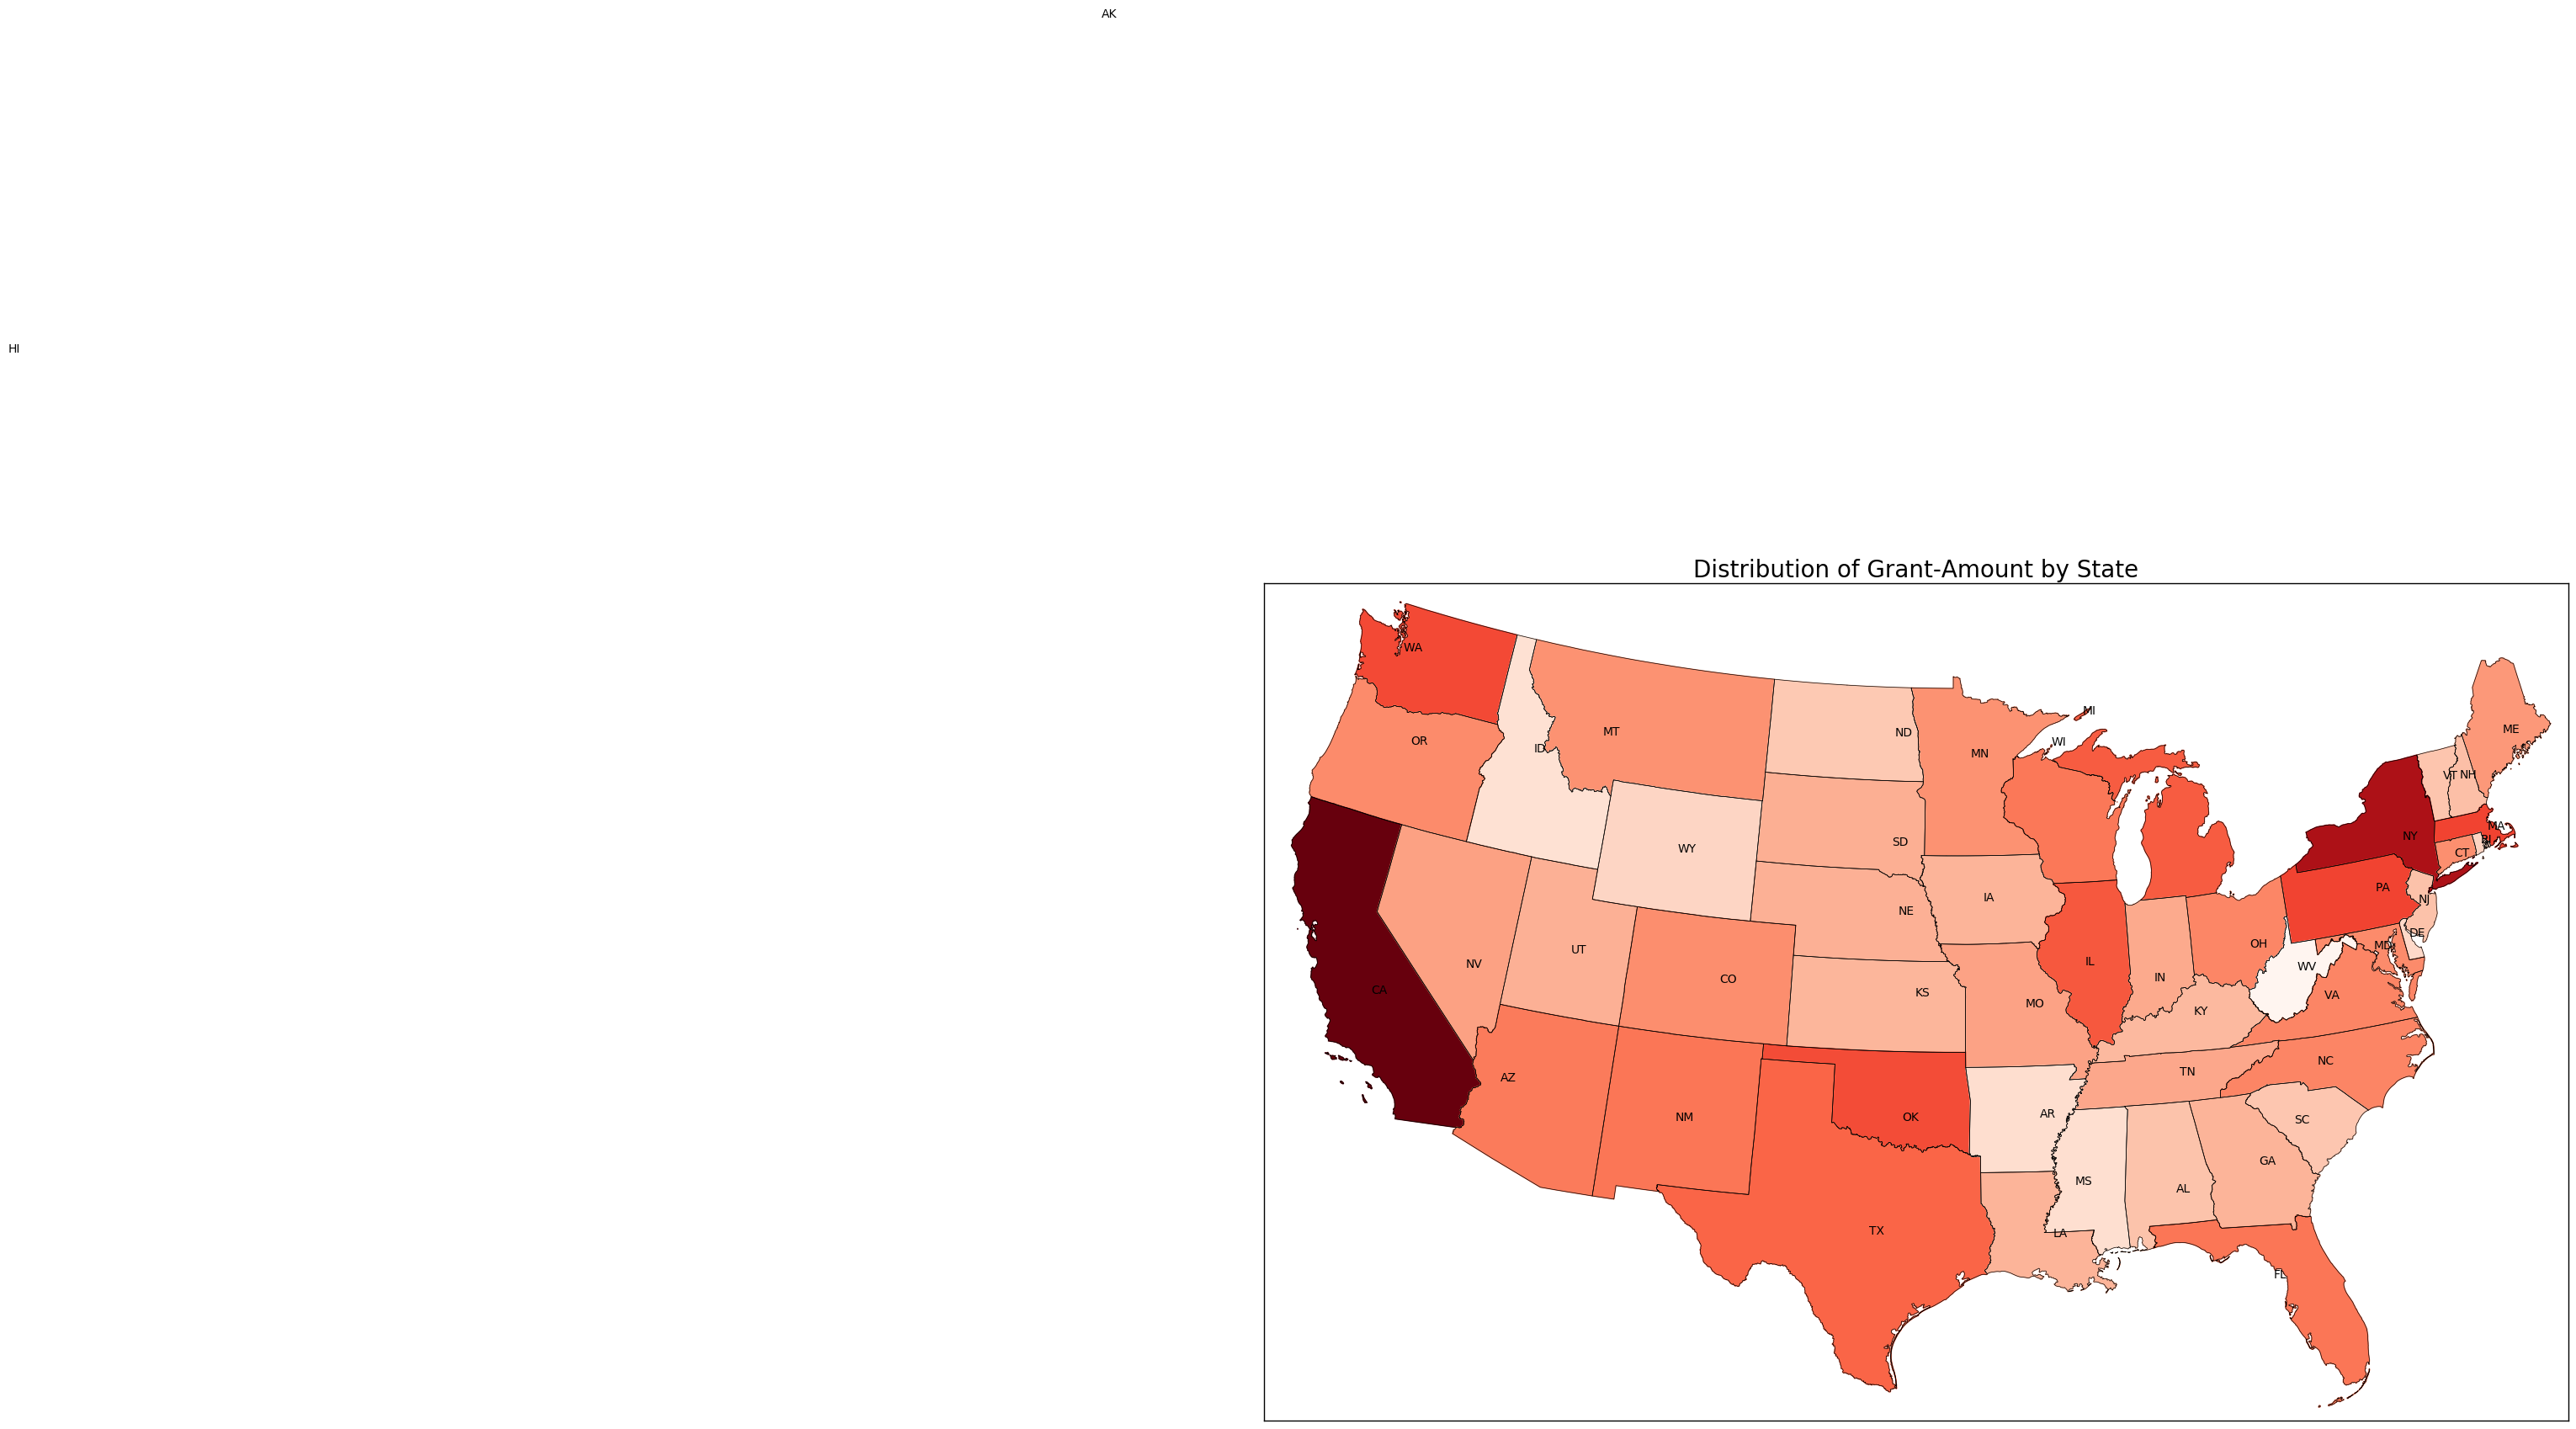

In [86]:
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Reference:
### http://stackoverflow.com/questions/39742305/how-to-use-basemap-python-to-plot-us-with-50-states
### http://stackoverflow.com/questions/42463200/draw-state-abbreviations-in-matplotlib-basemap

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20, 20)
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries
shp_info = m.readshapefile('st99_d00','states',drawbounds=True)


# choose a color for each state based on reward amount
colors={}
statenames=[]
cmap = plt.cm.Reds

for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = countdict[statename]
        colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))
    statenames.append(statename)


for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        cax=ax.add_patch(poly)
        
printed_names = []
for shapedict,state in zip(m.states_info, m.states):
    statename = shapedict['NAME']    
    if statename not in ['District of Columbia','Puerto Rico']:
        short_name = states_shortname[statename]
        if short_name in printed_names: continue
        x, y = np.array(state).mean(axis=0) 
        plt.text(x+.1, y, short_name)
    printed_names += [short_name] 

ax.set_title("Distribution of Grant-Amount by State",fontsize=20)




## Scatterplot of Grants (information about AwardTotal and ReqAwardAmount)

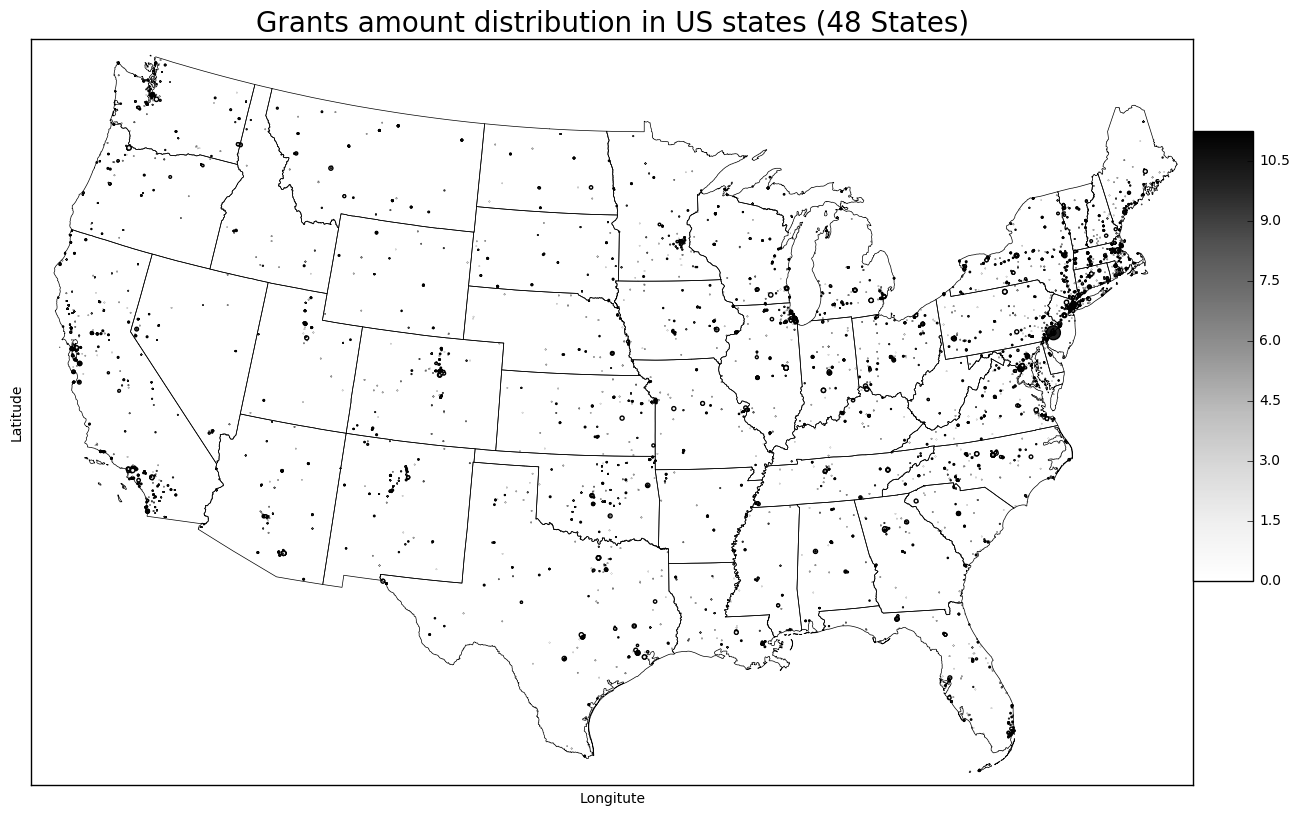

In [90]:
lon=data["Longitude"].tolist()
lat=data["Latitude"].tolist()

fig, ax = plt.subplots(figsize = (15,15))

m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
shape_info=m.readshapefile('st99_d00', name='states', drawbounds=True)
# set a geo coordinate (for example, new york)

x,y = m(lon,lat)

#Adjust the color and size scale of quantitative variables
min_val, max_val = data["AwardTotal"].min(), data["AwardTotal"].max()
data["rewardscale"] = ((data["AwardTotal"]-min_val)/(max_val-min_val))*100
data["new"]=((data["ReqAwardAmount"]-min_val)/(max_val-min_val))*10
cmap = plt.cm.Reds

ms=m.scatter(x, y, c=data["new"],s=(data["rewardscale"]),cmap = plt.cm.Greys)

# Create color bar
cax = fig.add_axes([0.9, 0.4, 0.04, 0.3])
cbar = fig.colorbar(ms, cax=cax)

ax.set_title("Grants amount distribution in US states (48 States)",fontsize=20)
ax.set_xlabel("Longitute")
ax.set_ylabel("Latitude")